In [1]:
import sklearn

In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\danie\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 171, in _merge_into_criterion
    crit = self.state.criteria[name]
KeyError: 'scikit-learn'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\danie\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\danie\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\danie\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\danie\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\danie\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\danie\anaconda3

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
cols = ['ItemID','Sentiment','SentimentSource','SentimentText']
df = pd.read_csv("Sentiment Analysis Dataset.csv", header=None, names=cols)
# above line will be different depending on where you saved your data, and your file name
df.head()

C:\Users\danie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ItemID,Sentiment,SentimentSource,SentimentText
0,ItemID,Sentiment,SentimentSource,SentimentText
1,1,0,Sentiment140,is so sad for my APL frie...
2,2,0,Sentiment140,I missed the New Moon trail...
3,3,1,Sentiment140,omg its already 7:30 :O
4,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...


In [3]:
df.Sentiment.value_counts()

0            732363
1            715180
1             74998
0             56073
Sentiment         1
Name: Sentiment, dtype: int64

In [4]:
df.drop(['ItemID','SentimentSource'],axis=1,inplace=True)

In [5]:
df[df.Sentiment == 0].head(10)

,Sentiment,SentimentText
131072,0,@do_over: missed yall yesterday!
131073,0,@do0dlebugdebz Ahhhhh! Joey Nice one. I miss...
131081,0,@do0dlebugdebz oh i c...wish i cud still delay...
131084,0,@do0dlebugdebz yess.because they just granted ...
131085,0,@Do0ki3 don;t die just give them a corrective
131090,0,@DOB1234 She was very gracious in defeat. Ther...
131092,0,@ciaranmoore nooooo! How gutting! Their still ...
131094,0,@ciaraof Sucks for the families in the cars bu...
131095,0,@ciarar24 umm so did i? weird. global warming?...
131101,0,@ciararyandreams the one of don't forgot that ...


In [6]:
df[df.Sentiment == 1].head(10)

,Sentiment,SentimentText
131074,1,@do0dlebugdebz *GROUP HUGS*..hey i still remem...
131075,1,@do0dlebugdebz @bill_archie @izzaluvsmusic goi...
131076,1,"@do0dlebugdebz ah ok...kinda like me,i love wr..."
131077,1,@do0dlebugdebz dont worry u're not d only one ...
131078,1,@do0dlebugdebz jst the same hope u make it..ni...
131079,1,@do0dlebugdebz LOL international Canadian pre-...
131080,1,"@do0dlebugdebz not now,but will be if you're o..."
131082,1,@do0dlebugdebz oh really...same here...early f...
131083,1,@do0dlebugdebz yeap got it debz
131086,1,@Do38 home? where the heck are you? Ima be hom...


In [7]:
df[df.Sentiment == 0].index

Int64Index([ 131072,  131073,  131081,  131084,  131085,  131090,  131092,
             131094,  131095,  131101,
            ...
            1578590, 1578591, 1578597, 1578598, 1578602, 1578605, 1578609,
            1578612, 1578613, 1578614],
           dtype='int64', length=732363)

In [8]:
df[df.Sentiment == 1].index

Int64Index([ 131074,  131075,  131076,  131077,  131078,  131079,  131080,
             131082,  131083,  131086,
            ...
            1578599, 1578600, 1578601, 1578603, 1578604, 1578606, 1578607,
            1578608, 1578610, 1578611],
           dtype='int64', length=715180)

In [9]:
df['pre_clean_len'] = [len(t) for t in df.SentimentText]

In [10]:
from pprint import pprint
data_dict = {
    'Sentiment':{
        'type':df.Sentiment.dtype,
        'description':'Sentiment class - 0:negative, 1:positive'
    },
    'SentimentText':{
        'type':df.SentimentText.dtype,
        'description':'tweet SentimentText'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)

{'Sentiment': {'description': 'Sentiment class - 0:negative, 1:positive',
               'type': dtype('O')},
 'SentimentText': {'description': 'tweet SentimentText', 'type': dtype('O')},
 'dataset_shape': (1578615, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')}}


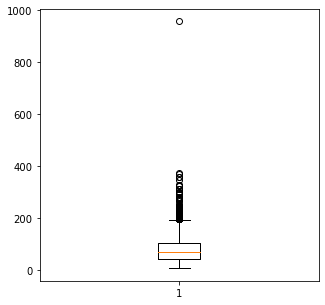

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [12]:
df[df.pre_clean_len > 150].head(10)

,Sentiment,SentimentText,pre_clean_len
858,1,Didn't have time updating because was 2 busy ...,154
2938,0,i love u bro. thanks for all the memories:sar...,156
3555,1,- spoke at an urban youth conference (&quot;Re...,151
4039,0,watching jon &amp; kate &quot;news&quot; on e...,159
4214,1,! RB @verawooten: &quot;@ladypn: &quot;Its a ...,151
4289,1,Mission Impossible 3 was awesome and if you ...,165
4290,0,Mission Impossible 3 sucks like a Theatan ene...,168
4342,1,Ø®ÙˆØ¯Ù…Ùˆ Ø²ÛŒØ§Ø¯ Ø§Ø°ÛŒØª Ù†Ú©Ø±Ø¯Ù…. Ø®ÛŒ...,154
4670,0,#ddth #cntt MÃ¹a hÃ¨ sÃ¡ng táº¡o viáº¿t á»©ng ...,154
4913,0,#fail #sony http://9pe2w.tk &quot;VidZone - Fr...,151


In [13]:
df.SentimentText[2938]

' i love u bro. thanks for all the memories:saran wrap,burger king,chicharon,&quot;focker&quot;,rides home,our convo at milk,&quot;awww little!!&quot;,etc :/'

In [14]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.SentimentText[2938], 'lxml')
print(example1.get_text())

i love u bro. thanks for all the memories:saran wrap,burger king,chicharon,"focker",rides home,our convo at milk,"awww little!!",etc :/


In [15]:
df.SentimentText[47]

'  @Spiral_galaxy @YMPtweet  it really makes me sad when i look at Muslims reality now'

In [16]:
import re
re.sub(r'@[A-Za-z0-9_]+','',df.SentimentText[47])

'     it really makes me sad when i look at Muslims reality now'

In [17]:
df.SentimentText[17]

"    awhhe man.... I'm completely useless rt now. Funny, all I can do is twitter. http://myloc.me/27HX"

In [18]:
re.sub('https?://[A-Za-z0-9./]+','',df.SentimentText[17])

"    awhhe man.... I'm completely useless rt now. Funny, all I can do is twitter. "

In [19]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(SentimentText):
    soup = BeautifulSoup(SentimentText, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.SentimentText[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['sentimenttext',
 'is so sad for my apl friend',
 'i missed the new moon trailer',
 'omg its already o',
 'omgaga im sooo im gunna cry i ve been at this dentist since i was suposed just get a crown put on mins',
 'i think mi bf is cheating on me t t',
 'or i just worry too much',
 'juuuuuuuuuuuuuuuuussssst chillin',
 'sunny again work tomorrow tv tonight',
 'handed in my uniform today i miss you already',
 'hmmmm i wonder how she my number',
 'i must think about positive',
 'thanks to all the haters up in my face all day',
 'this weekend has sucked so far',
 'jb isnt showing in australia any more',
 'ok thats it you win',
 'this is the way i feel right now',
 'awhhe man i m completely useless rt now funny all i can do is twitter',
 'feeling strangely fine now i m gonna go listen to some semisonic to celebrate',
 'huge roll of thunder just now so scary',
 'i just cut my beard off it s only been growing for well over a year i m gonna start it over is happy in the meantime',
 'very sad a

In [20]:
df.head()

,Sentiment,SentimentText,pre_clean_len
0,Sentiment,SentimentText,13
1,0,is so sad for my APL frie...,61
2,0,I missed the New Moon trail...,51
3,1,omg its already 7:30 :O,37
4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578615 entries, 0 to 1578614
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Sentiment      1578615 non-null  object
 1   SentimentText  1578615 non-null  object
 2   pre_clean_len  1578615 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 36.1+ MB


In [94]:
nums = [0,400000,800000,1200000,1600000]

In [99]:
%%time
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % (i+1, nums[1]))                                                                
    clean_tweet_texts.append(tweet_cleaner(df['SentimentText'][i]))

Cleaning and parsing the tweets...



C:\Users\danie\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: " i just received my G8 viola exam.. and its... well... .. disappointing.. :\.." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Tweets 10000 of 400000 has been processed
Tweets 20000 of 400000 has been processed
Tweets 30000 of 400000 has been processed
Tweets 40000 of 400000 has been processed
Tweets 50000 of 400000 has been processed
Tweets 60000 of 400000 has been processed
Tweets 70000 of 400000 has been processed
Tweets 80000 of 400000 has been processed
Tweets 90000 of 400000 has been processed
Tweets 100000 of 400000 has been processed
Tweets 110000 of 400000 has been processed
Tweets 120000 of 400000 has been processed
Tweets 130000 of 400000 has been processed
Tweets 140000 of 400000 has been processed
Tweets 150000 of 400000 has been processed
Tweets 160000 of 400000 has been processed
Tweets 170000 of 400000 has been processed
Tweets 180000 of 400000 has been processed
Tweets 190000 of 400000 has been processed
Tweets 200000 of 400000 has been processed
Tweets 210000 of 400000 has been processed
Tweets 220000 of 400000 has been processed
Tweets 230000 of 400000 has been processed
Tweets 240000 of 400

In [100]:
len(clean_tweet_texts)

400000

In [104]:
%%time
print("Cleaning and parsing the tweets...\n")
for i in range(nums[1],nums[2]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[2] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['SentimentText'][i]))

Cleaning and parsing the tweets...

Tweets 410000 of 800000 has been processed
Tweets 420000 of 800000 has been processed
Tweets 430000 of 800000 has been processed
Tweets 440000 of 800000 has been processed
Tweets 450000 of 800000 has been processed
Tweets 460000 of 800000 has been processed
Tweets 470000 of 800000 has been processed
Tweets 480000 of 800000 has been processed
Tweets 490000 of 800000 has been processed
Tweets 500000 of 800000 has been processed
Tweets 510000 of 800000 has been processed
Tweets 520000 of 800000 has been processed
Tweets 530000 of 800000 has been processed
Tweets 540000 of 800000 has been processed
Tweets 550000 of 800000 has been processed
Tweets 560000 of 800000 has been processed
Tweets 570000 of 800000 has been processed
Tweets 580000 of 800000 has been processed
Tweets 590000 of 800000 has been processed
Tweets 600000 of 800000 has been processed
Tweets 610000 of 800000 has been processed
Tweets 620000 of 800000 has been processed
Tweets 630000 of 8

C:\Users\danie\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \../  \../" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Tweets 700000 of 800000 has been processed
Tweets 710000 of 800000 has been processed
Tweets 720000 of 800000 has been processed
Tweets 730000 of 800000 has been processed
Tweets 740000 of 800000 has been processed
Tweets 750000 of 800000 has been processed
Tweets 760000 of 800000 has been processed
Tweets 770000 of 800000 has been processed
Tweets 780000 of 800000 has been processed
Tweets 790000 of 800000 has been processed
Tweets 800000 of 800000 has been processed
Wall time: 2min 5s


In [105]:
len(clean_tweet_texts)

800000

In [107]:
%%time
print("Cleaning and parsing the tweets...\n")
for i in range(nums[2],nums[3]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[3] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['SentimentText'][i]))

Cleaning and parsing the tweets...

Tweets 810000 of 1200000 has been processed
Tweets 820000 of 1200000 has been processed
Tweets 830000 of 1200000 has been processed
Tweets 840000 of 1200000 has been processed
Tweets 850000 of 1200000 has been processed
Tweets 860000 of 1200000 has been processed
Tweets 870000 of 1200000 has been processed
Tweets 880000 of 1200000 has been processed
Tweets 890000 of 1200000 has been processed
Tweets 900000 of 1200000 has been processed
Tweets 910000 of 1200000 has been processed
Tweets 920000 of 1200000 has been processed
Tweets 930000 of 1200000 has been processed
Tweets 940000 of 1200000 has been processed
Tweets 950000 of 1200000 has been processed
Tweets 960000 of 1200000 has been processed
Tweets 970000 of 1200000 has been processed
Tweets 980000 of 1200000 has been processed
Tweets 990000 of 1200000 has been processed
Tweets 1000000 of 1200000 has been processed
Tweets 1010000 of 1200000 has been processed
Tweets 1020000 of 1200000 has been pro

In [108]:
%%time
print("Cleaning and parsing the tweets...\n")
for i in range(nums[3],nums[4]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[4] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['SentimentText'][i]))

Cleaning and parsing the tweets...

Tweets 1210000 of 1600000 has been processed
Tweets 1220000 of 1600000 has been processed
Tweets 1230000 of 1600000 has been processed
Tweets 1240000 of 1600000 has been processed
Tweets 1250000 of 1600000 has been processed
Tweets 1260000 of 1600000 has been processed
Tweets 1270000 of 1600000 has been processed
Tweets 1280000 of 1600000 has been processed
Tweets 1290000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1310000 of 1600000 has been processed
Tweets 1320000 of 1600000 has been processed
Tweets 1330000 of 1600000 has been processed
Tweets 1340000 of 1600000 has been processed
Tweets 1350000 of 1600000 has been processed
Tweets 1360000 of 1600000 has been processed
Tweets 1370000 of 1600000 has been processed
Tweets 1380000 of 1600000 has been processed
Tweets 1390000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1410000 of 1600000 has been processed
Tweets 1420000 of 1

KeyError: 1578615

In [109]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['SentimentText'])
clean_df['target'] = df.Sentiment
clean_df.head()

,SentimentText,target
0,sentimenttext,Sentiment
1,is so sad for my apl friend,0
2,i missed the new moon trailer,0
3,omg its already o,1
4,omgaga im sooo im gunna cry i ve been at this ...,0


In [110]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')

In [111]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

C:\Users\danie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\danie\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,SentimentText,target
0,sentimenttext,Sentiment
1,is so sad for my apl friend,0
2,i missed the new moon trailer,0
3,omg its already o,1
4,omgaga im sooo im gunna cry i ve been at this ...,0


In [52]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
Note: you may need to restart the kernel to use updated packages.


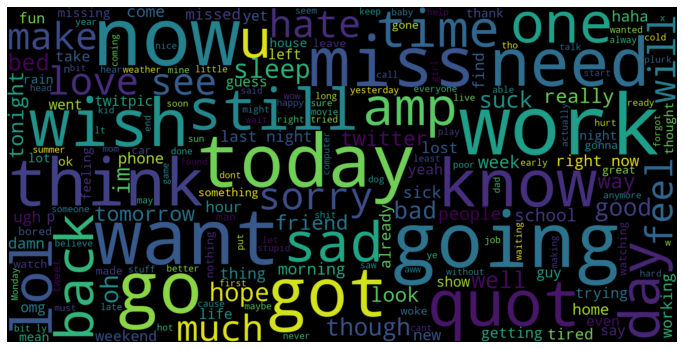

In [35]:
neg_tweets = df[df.Sentiment == 0]
neg_string = []
for t in neg_tweets.SentimentText:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
for n in neg_tweets.SentimentText[:200]:
    if 'work' in n:
        print(n)

@cibrax Well, it doesn't work at all 
@DocAdams, does the Paypal donate button not work yet for the Amber's Angel's campaign? I am having issues 
@DocCsi Yeah, I'll try to be there soon. Will you be there at opening? I have work at noon and can't stick around. 
@Doctor005 yes...hun I'm ok(ish)..Doing other things to keep me off Twitter! Doesn't seem to be working!  How are you?
@dogjustice Thanks so much for your donation for #Chance UR da best!!  Such a hard blow after working so hard to save him 
@dogwierdo you gotta work all the tiiiimmme because you actually have a job.  i dont 
@cisforcupcakes we couldnt go to the pool  but if u want to go I think we r gonna try again today hahahaha or workout instead.
@CitizenSwift the screen died after two years of me trashing it  I'm sure it still works but like $140+ to fix the screen on my N95 
@CITROENRO it's not working for us. For some reason... 
@cittiecait that didn't work for me.. 
@citystars41 well you are lucky  i had to work on the f

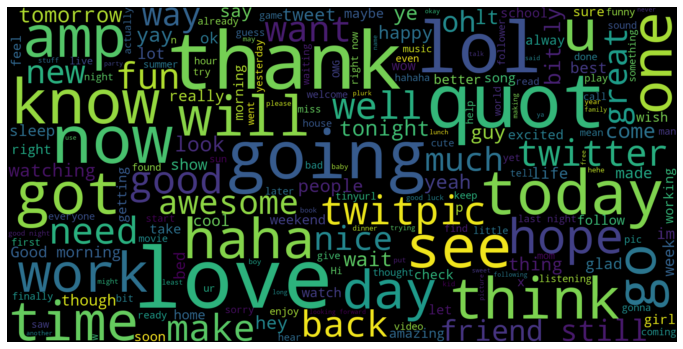

In [34]:
pos_tweets = df[df.Sentiment == 1]
pos_string = []
for t in pos_tweets.SentimentText:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
for p in pos_tweets.SentimentText[:200]:
    if 'thank' in p:
        print(p)

@CiinTa__ thanksssssss  hai!
@cijoaj2003 thanks man! it gets pretty intense when the clock hits the hour 
@DocCarl2004 thanks for the link 
@cindeetl thank u 
@Doctor_Rob sweet... well do let me know how the qualifying pans out then.. thanks 
@cindyoyo thanks for the great follow @johnlusher, he had me at cigar smoker 
@CindySue1 they are beautiful pics and horses!!!  thanks for sharing!
@cinebo lol, i kinda doubt that, but thanks anyways 


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df.SentimentText)

CountVectorizer()

In [39]:
len(cvec.get_feature_names())

685487

In [41]:
neg_doc_matrix = cvec.transform(df[df.Sentiment == 0].SentimentText)
pos_doc_matrix = cvec.transform(df[df.Sentiment == 1].SentimentText)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [42]:
document_matrix = cvec.transform(df.SentimentText)
df[df.Sentiment == 0].tail()

,Sentiment,SentimentText,pre_clean_len
1578605,0,Zzzz lying in bed watching the countryside thr...,121
1578609,0,Zzzzz want to sleep but at sister's in-laws's ...,53
1578612,0,ZzzZzZzzzZ... wait no I have homework.,39
1578613,0,"ZzZzzzZZZZzzz meh, what am I doing up again?",45
1578614,0,"Zzzzzzzzzzzzzzzzzzz, I wish",28


In [46]:
%%time
neg_batches = np.linspace(0,798179,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
        print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

8062 entries' term freuquency calculated
88686 entries' term freuquency calculated
169310 entries' term freuquency calculated
249934 entries' term freuquency calculated
330558 entries' term freuquency calculated
411183 entries' term freuquency calculated
491807 entries' term freuquency calculated
572431 entries' term freuquency calculated
653055 entries' term freuquency calculated
733679 entries' term freuquency calculated
798179 entries' term freuquency calculated
Wall time: 9h 38min 9s


In [48]:
%%time
pos_batches = np.linspace(798179,1596019,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

806237 entries' term freuquency calculated
886827 entries' term freuquency calculated
967417 entries' term freuquency calculated
1048007 entries' term freuquency calculated
1128597 entries' term freuquency calculated
1209187 entries' term freuquency calculated
1289777 entries' term freuquency calculated
1370367 entries' term freuquency calculated
1450957 entries' term freuquency calculated
1531547 entries' term freuquency calculated
1596019 entries' term freuquency calculated
Wall time: 1h 32min 27s


In [58]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

,0,1
00,494,702
000,477,536
0000,1,3
00000,2,0
000000000000,1,0


In [59]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:20]

,negative,positive,total
to,259007,302648,561655
the,249251,272526,521777
my,121691,192242,313933
it,168603,134920,303523
and,142115,160604,302719
you,213813,85958,299771
is,94613,142017,236630
in,100621,114978,215599
for,105637,109502,215139
of,87309,95723,183032


In [64]:
len(term_freq_df)

685487

In [65]:
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')

Text(0.5, 1.0, 'Top 500 tokens in tweets')

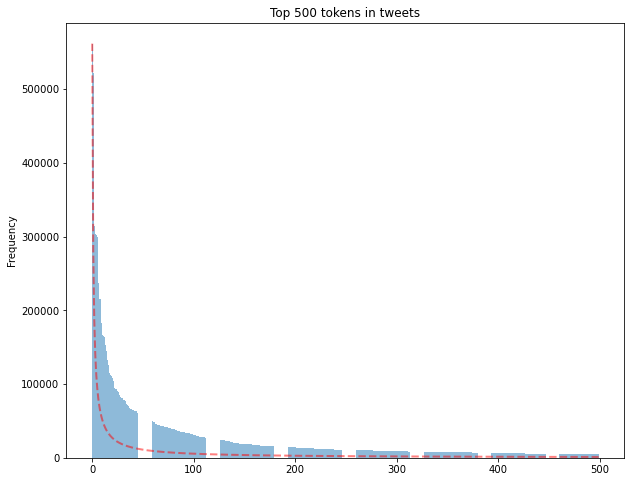

In [60]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

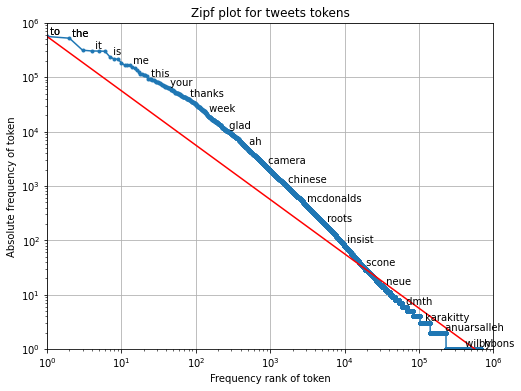

In [61]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

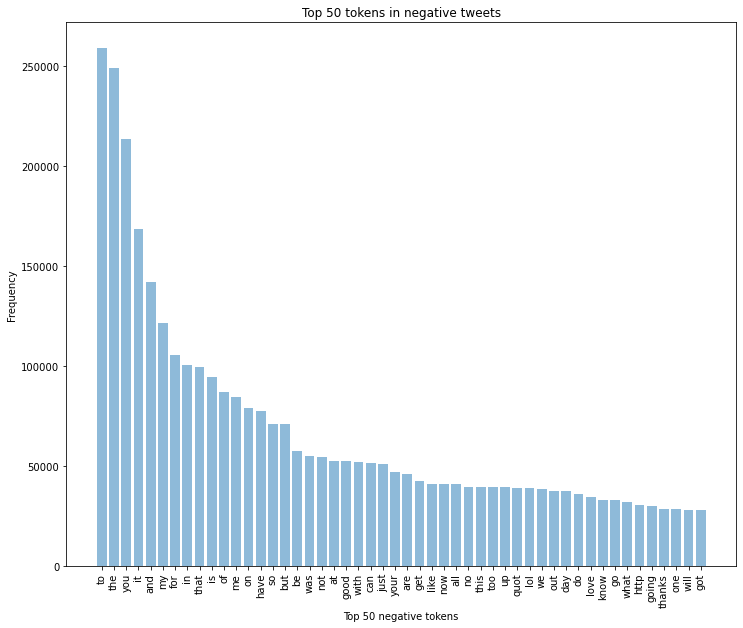

In [63]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

In [66]:
term_freq_df = pd.read_csv('term_freq_df.csv',index_col=0, encoding='utf_8')

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df.SentimentText)

CountVectorizer(max_features=10000, stop_words='english')

In [69]:
document_matrix = cvec.transform(df.SentimentText)

In [71]:
%%time
neg_batches = np.linspace(0,798179,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

88686 entries' term freuquency calculated
177373 entries' term freuquency calculated
266059 entries' term freuquency calculated
354746 entries' term freuquency calculated
443432 entries' term freuquency calculated
532119 entries' term freuquency calculated
620805 entries' term freuquency calculated
709492 entries' term freuquency calculated
798179 entries' term freuquency calculated
Wall time: 23.4 s


In [73]:
%%time
pos_batches = np.linspace(798179,1596019,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

886827 entries' term freuquency calculated
975476 entries' term freuquency calculated
1064125 entries' term freuquency calculated
1152774 entries' term freuquency calculated
1241423 entries' term freuquency calculated
1330072 entries' term freuquency calculated
1418721 entries' term freuquency calculated
1507370 entries' term freuquency calculated
1596019 entries' term freuquency calculated
Wall time: 23 s


In [75]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['positive', 'negative']
term_freq_df2['total'] = term_freq_df2['positive'] + term_freq_df2['negative']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:20]

,positive,negative,total
just,50911,75308,126219
good,52306,37444,89750
day,37451,47999,85450
like,41162,37171,78333
quot,39293,32105,71398
http,30447,39823,70270
today,24979,42637,67616
love,34546,29906,64452
going,30126,33833,63959
work,26586,36738,63324


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

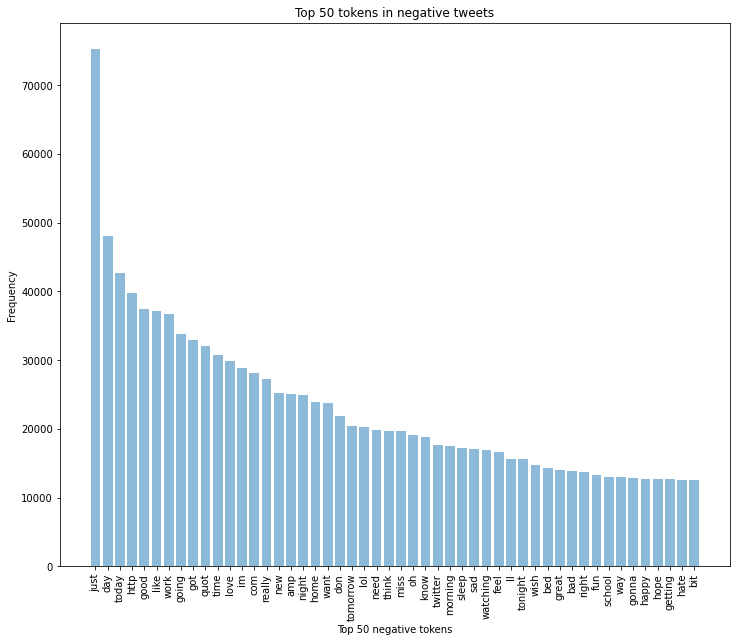

In [76]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

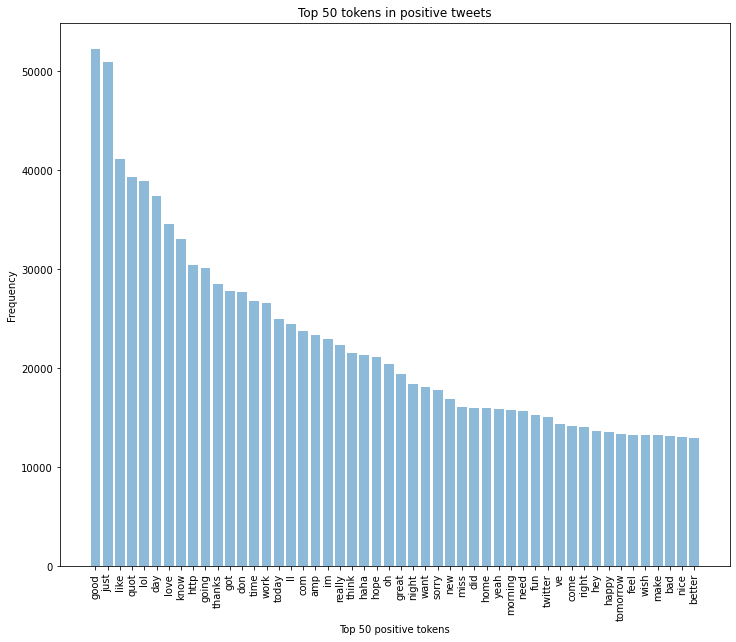

In [77]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

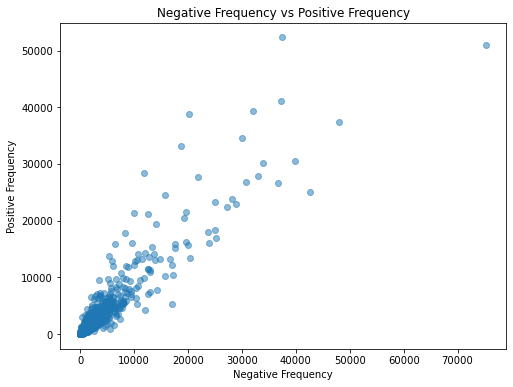

In [78]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [79]:
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:20]

,positive,negative,total,pos_rate
alexandramusic,79,0,79,1.000000
1capplegate,139,1,140,0.992857
alancarr,117,1,118,0.991525
crunchyk,102,1,103,0.990291
dojie,95,1,96,0.989583
fearnecotton,176,2,178,0.988764
ebassman,246,3,249,0.987952
elizapatricia,76,1,77,0.987013
colorblindfish,128,2,130,0.984615
debbiefletcher,217,4,221,0.981900


In [80]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:20]

,positive,negative,total,pos_rate,pos_freq_pct
good,52306,37444,89750,0.582797,0.011292
just,50911,75308,126219,0.403354,0.010991
like,41162,37171,78333,0.525475,0.008886
quot,39293,32105,71398,0.550338,0.008483
lol,38883,20216,59099,0.657930,0.008394
day,37451,47999,85450,0.438280,0.008085
love,34546,29906,64452,0.535996,0.007458
know,33115,18756,51871,0.638411,0.007149
http,30447,39823,70270,0.433286,0.006573
going,30126,33833,63959,0.471020,0.006504


In [83]:
from scipy.stats import hmean

term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])
                                                                   if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:20]

,positive,negative,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
good,52306,37444,89750,0.582797,0.011292,0.022155,0.813694,1.0,0.897278
just,50911,75308,126219,0.403354,0.010991,0.021399,0.194605,1.0,0.325806
like,41162,37171,78333,0.525475,0.008886,0.017477,0.629948,1.0,0.772967
quot,39293,32105,71398,0.550338,0.008483,0.016708,0.717204,1.0,0.835316
lol,38883,20216,59099,0.657930,0.008394,0.016577,0.947964,1.0,0.973287
day,37451,47999,85450,0.438280,0.008085,0.015877,0.301556,1.0,0.463377
love,34546,29906,64452,0.535996,0.007458,0.014711,0.668029,1.0,0.800980
know,33115,18756,51871,0.638411,0.007149,0.014140,0.924325,1.0,0.960675
http,30447,39823,70270,0.433286,0.006573,0.012950,0.284778,1.0,0.443310
going,30126,33833,63959,0.471020,0.006504,0.012830,0.420683,1.0,0.592226


In [82]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:20]

,positive,negative,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
aww,6457,1903,8360,0.772368,0.001394,0.002783,0.996958,0.998987,0.997971
ur,9570,3402,12972,0.737743,0.002066,0.004121,0.991913,0.999999,0.995940
hey,13678,5233,18911,0.723283,0.002953,0.005882,0.988205,1.000000,0.994067
hi,6673,2659,9332,0.715066,0.001441,0.002875,0.985500,0.999307,0.992356
yeah,15941,6434,22375,0.712447,0.003441,0.006850,0.984532,1.000000,0.992206
sounds,6254,2501,8755,0.714335,0.001350,0.002695,0.985235,0.998567,0.991856
thanks,28485,11746,40231,0.708036,0.006149,0.012193,0.982778,1.000000,0.991314
hear,7002,3007,10009,0.699570,0.001512,0.003017,0.978930,0.999620,0.989167
welcome,5133,2145,7278,0.705276,0.001108,0.002213,0.981595,0.991904,0.986722
awww,4325,1274,5599,0.772459,0.000934,0.001865,0.996966,0.976621,0.986689


In [84]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])
                                                                   if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:20]

,positive,negative,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
woke,1675,6158,7833,0.213839,0.000362,0.000722,0.003343,0.733676,0.006656,0.786161,0.001274,0.002544,0.996657,0.997291,0.996974
watching,5324,16987,22311,0.238627,0.001149,0.002288,0.006756,0.993841,0.013421,0.761373,0.003515,0.006997,0.993244,1.000000,0.996610
plurk,877,5459,6336,0.138415,0.000189,0.000378,0.000282,0.584363,0.000563,0.861585,0.001129,0.002256,0.999718,0.992626,0.996159
ugh,2562,7443,10005,0.256072,0.000553,0.001104,0.010736,0.860085,0.021207,0.743928,0.001540,0.003074,0.989264,0.999676,0.994443
tired,4155,11902,16057,0.258766,0.000897,0.001788,0.011505,0.971346,0.022740,0.741234,0.002463,0.004909,0.988495,1.000000,0.994214
listening,1963,5640,7603,0.258188,0.000424,0.000846,0.011336,0.780021,0.022347,0.741812,0.001167,0.002330,0.988664,0.994251,0.991450
hurts,1834,5012,6846,0.267894,0.000396,0.000791,0.014477,0.759857,0.028412,0.732106,0.001037,0.002071,0.985523,0.986771,0.986147
wants,1493,4644,6137,0.243278,0.000322,0.000644,0.007664,0.702032,0.015162,0.756722,0.000961,0.001919,0.992336,0.979279,0.985764
sitting,1142,4136,5278,0.216370,0.000247,0.000493,0.003601,0.636650,0.007161,0.783630,0.000856,0.001710,0.996399,0.963282,0.979561
waiting,3176,6557,9733,0.326313,0.000686,0.001368,0.053314,0.918772,0.100781,0.673687,0.001357,0.002708,0.946686,0.998543,0.971923


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

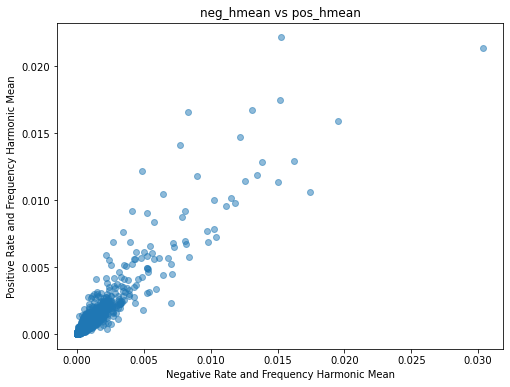

In [85]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

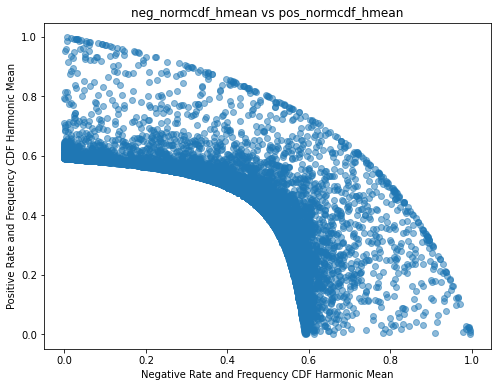

In [86]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [87]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df2.pos_normcdf_hmean), high=max(term_freq_df2.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df2,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)

Loading BokehJS ...